In [ ]:
import pandas as pd
df=pd.read_csv('Strokes.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_2
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,233.008420
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,205.245454
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,107.460932
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,173.376126
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,175.038492


 Assumptions for Pearson Correlation:
# 1. The variables are continuous. (Age, BMI, and avg_glucose_level are continuous)
# 2. The variables are approximately normally distributed. (Need to check distributions, but Pearson is somewhat robust to violations)
# 3. There is a linear relationship between the variables. (Need to visually inspect scatter plots)
# 4. There are no significant outliers. (Need to check for outliers)

In [ ]:
#Pearson Correlation between age, BM, and avg_glocose level write assumptions first

# We will calculate the Pearson correlation matrix for 'age', 'bmi', and 'avg_glucose_level'.
# Note: The column name for BMI in your dataset might be 'bmi' or something similar.
# Please adjust 'bmi' if it is different in your 'Strokes.csv' file.
# Also, we should handle missing values in 'bmi' before calculating correlation.
# A common approach is to fill missing BMI values with the mean or median.

# First, let's check for and handle missing 'bmi' values.
if 'bmi' in df.columns and df['bmi'].isnull().any():
    print(f"Found {df['bmi'].isnull().sum()} missing values in 'bmi'. Filling with the mean.")
    df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Now, select the relevant columns and calculate the Pearson correlation matrix.
correlation_matrix = df[['age', 'bmi', 'avg_glucose_level']].corr(method='pearson')

print("\nPearson Correlation Matrix:")
correlation_matrix


Pearson Correlation Matrix:


,age,bmi,avg_glucose_level
age,1.000000,0.325942,0.238171
bmi,0.325942,1.000000,0.168751
avg_glucose_level,0.238171,0.168751,1.000000


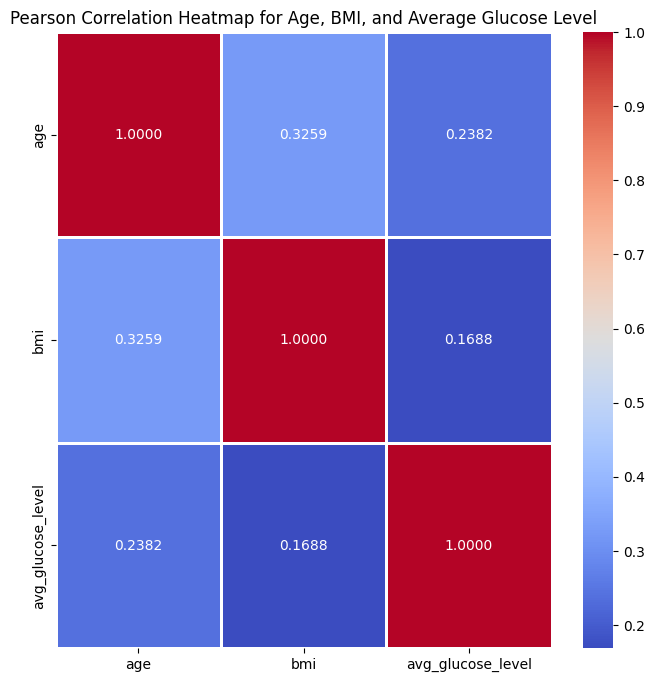

In [ ]:
# prompt: Heat map

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.8)
plt.title('Pearson Correlation Heatmap for Age, BMI, and Average Glucose Level')
plt.show()

Assumptions for Spearman Correlation:
# 1. The variables are at least ordinal. (Age, BMI, and avg_glucose_level are at least ordinal, they are continuous)
# 2. The relationship between variables does not need to be linear.
# 3. The data should be monotonic (consistently increasing or decreasing), but not necessarily linear.


Spearman Correlation Matrix:


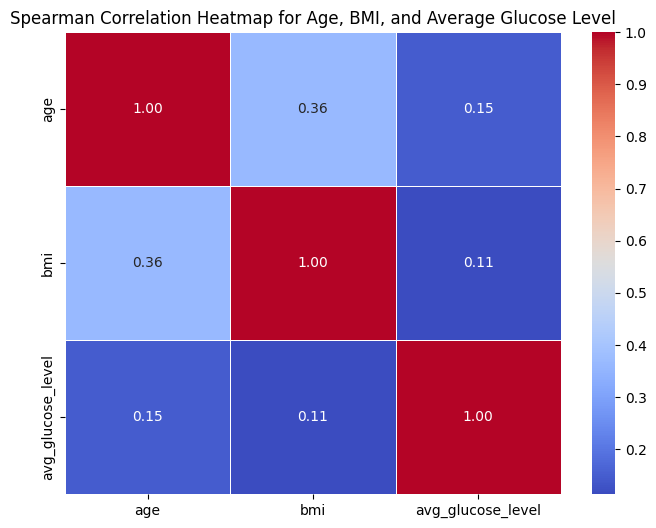

In [ ]:
# prompt: Spearman correlation

import matplotlib.pyplot as plt

# Now, calculate the Spearman correlation matrix for 'age', 'bmi', and 'avg_glucose_level'.
# We still need to handle missing BMI values for consistency, although Spearman handles outliers better than Pearson.

# First, let's re-check for and handle missing 'bmi' values, just in case the preceding code wasn't executed.
if 'bmi' in df.columns and df['bmi'].isnull().any():
    print(f"Found {df['bmi'].isnull().sum()} missing values in 'bmi'. Filling with the mean.")
    df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Now, select the relevant columns and calculate the Spearman correlation matrix.
spearman_correlation_matrix = df[['age', 'bmi', 'avg_glucose_level']].corr(method='spearman')

print("\nSpearman Correlation Matrix:")
spearman_correlation_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap for Age, BMI, and Average Glucose Level')
plt.show()

Kendall's tau test is used to assess the monotonic relationship between two ordinal variables or ranked data. It measures the similarity in the ranking of data points between the two variables, indicating the strength and direction of their association. Unlike Pearson correlation, Kendall's tau does not assume a linear relationship and is more robust to outliers and non-linear data
# Assumptions for Kendall's Tau Correlation:
# 1. The variables are at least ordinal. (Age, BMI, and avg_glucose_level are at least ordinal, they are continuous)
# 2. Measures the strength of dependence between two variables.
# 3. Less sensitive to outliers than Pearson.


Kendall's Tau Correlation Matrix:


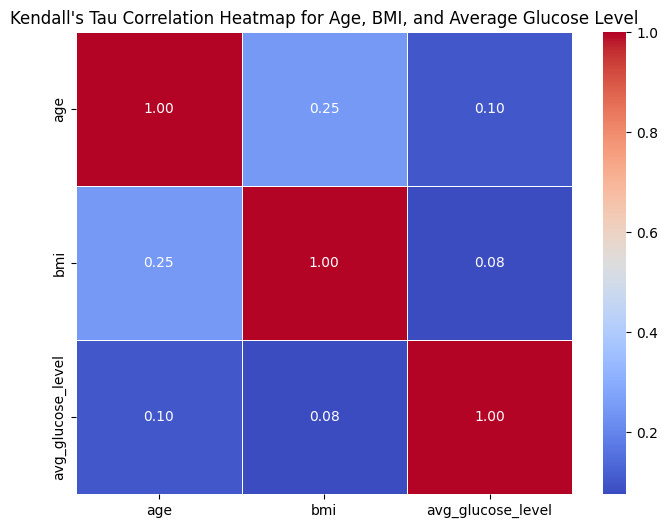

In [ ]:
# prompt: Perform Kendall's tau test

import matplotlib.pyplot as plt
# Assumptions for Kendall's Tau Correlation:
# 1. The variables are at least ordinal. (Age, BMI, and avg_glucose_level are at least ordinal, they are continuous)
# 2. Measures the strength of dependence between two variables.
# 3. Less sensitive to outliers than Pearson.

# Now, calculate the Kendall's Tau correlation matrix for 'age', 'bmi', and 'avg_glucose_level'.
# We should still handle missing BMI values for consistency.

# First, let's re-check for and handle missing 'bmi' values, just in case the preceding code wasn't executed.
if 'bmi' in df.columns and df['bmi'].isnull().any():
    print(f"Found {df['bmi'].isnull().sum()} missing values in 'bmi'. Filling with the mean.")
    df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Now, select the relevant columns and calculate the Kendall's Tau correlation matrix.
kendall_correlation_matrix = df[['age', 'bmi', 'avg_glucose_level']].corr(method='kendall')

print("\nKendall's Tau Correlation Matrix:")
kendall_correlation_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(kendall_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Kendall's Tau Correlation Heatmap for Age, BMI, and Average Glucose Level")
plt.show()

In [ ]:
# prompt: Can i find correlation between age and glocose only with p values

from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value between 'age' and 'avg_glucose_level'
correlation, p_value = pearsonr(df['age'], df['avg_glucose_level'])

print(f"\nPearson correlation between Age and Average Glucose Level:")
print(f"  Correlation Coefficient: {correlation:.3f}")
print(f"  P-value: {p_value:.4f}")

# You can interpret the p-value:
# A small p-value (typically < 0.05) suggests a statistically significant relationship
# between the two variables.



Pearson correlation between Age and Average Glucose Level:
  Correlation Coefficient: 0.238
  P-value: 0.0000
